In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv(r'datasets/GlobalLandTemperaturesByCity.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [4]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [11]:
column_names = {"dt":"Date", "AverageTemperature":"Mean_temp", 
                "AverageTemperatureUncertainty":"Mean_temp_uncertainly"}
df.rename(columns=column_names, inplace=True)

In [16]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")

In [21]:
df.isnull().sum()

Date                          0
Mean_temp                364130
Mean_temp_uncertainly    364130
City                          0
Country                       0
Latitude                      0
Longitude                     0
dtype: int64

In [30]:
def median_for_nulls_in_columns(df):
    for col in df.columns:
        if df[col].isnull().any():
            median = df[col].median()
            df[col].fillna(median, inplace=True)
    return df

df = median_for_nulls_in_columns(df)

In [33]:
df.isnull().sum()

Date                     0
Mean_temp                0
Mean_temp_uncertainly    0
City                     0
Country                  0
Latitude                 0
Longitude                0
dtype: int64

In [43]:
df.head()

,Date,Mean_temp,Mean_temp_uncertainly,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,18.831,0.591,Århus,Denmark,57.05N,10.33E
2,1744-01-01,18.831,0.591,Århus,Denmark,57.05N,10.33E
3,1744-02-01,18.831,0.591,Århus,Denmark,57.05N,10.33E
4,1744-03-01,18.831,0.591,Århus,Denmark,57.05N,10.33E


In [34]:
loc_brazil_df = df.loc[(df.Country == "Brazil"), :]
loc_brazil_df

,Date,Mean_temp,Mean_temp_uncertainly,City,Country,Latitude,Longitude
152741,1832-01-01,25.953,1.570,Alagoinhas,Brazil,12.05S,37.81W
152742,1832-02-01,25.933,2.372,Alagoinhas,Brazil,12.05S,37.81W
152743,1832-03-01,25.968,1.585,Alagoinhas,Brazil,12.05S,37.81W
152744,1832-04-01,25.100,2.175,Alagoinhas,Brazil,12.05S,37.81W
152745,1832-05-01,24.213,1.809,Alagoinhas,Brazil,12.05S,37.81W
...,...,...,...,...,...,...,...
8109068,2013-05-01,18.377,0.527,Volta Redonda,Brazil,21.70S,44.13W
8109069,2013-06-01,18.072,0.398,Volta Redonda,Brazil,21.70S,44.13W
8109070,2013-07-01,17.539,0.646,Volta Redonda,Brazil,21.70S,44.13W
8109071,2013-08-01,18.595,0.614,Volta Redonda,Brazil,21.70S,44.13W


In [37]:
loc_brazil_df.City.nunique()

220

In [38]:
# average temperature in the city of Brazil
atc_Brazil = loc_brazil_df.groupby(["Date"])[["Mean_temp", "Mean_temp_uncertainly"]].mean()
atc_Brazil

,Mean_temp,Mean_temp_uncertainly
Date,,
1824-01-01,26.300250,1.281250
1824-02-01,25.624500,2.047750
1824-03-01,26.032750,1.409250
1824-04-01,25.989500,1.752000
1824-05-01,25.720750,1.351500
...,...,...
2013-05-01,21.389836,0.607659
2013-06-01,20.872459,0.458605
2013-07-01,20.031705,0.553068


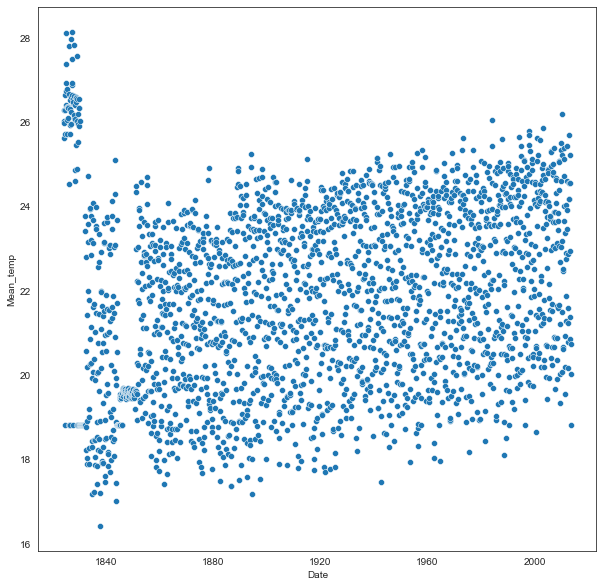

In [41]:
sns.set_style("white")
plt.figure(figsize=(10, 10))

# Gráfico de Dispersão
sns.scatterplot(x="Date", y="Mean_temp", 
                    data=atc_Brazil)
plt.show()

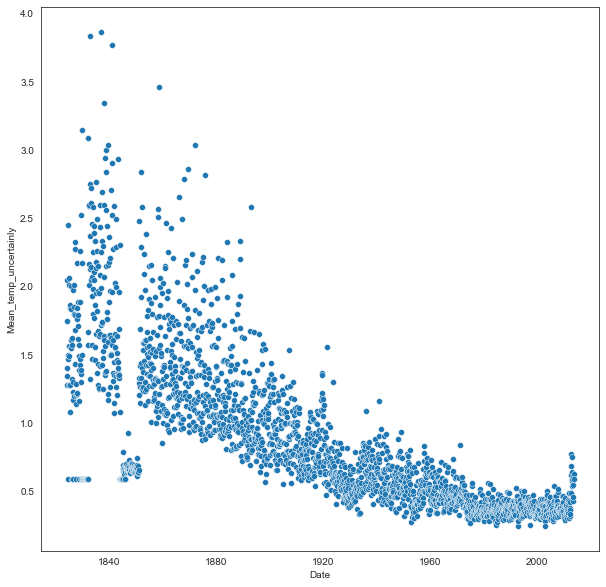

In [42]:

sns.set_style("white")
plt.figure(figsize=(10, 10))

sns.scatterplot(x="Date", y="Mean_temp_uncertainly", 
                    data=atc_Brazil)
plt.show()